Configuration Files

In [26]:
!gdown https://drive.google.com/uc?id=16Qhmueb_OXuZ1kRLmp7jFdeI3XxNfDFm 

Downloading...
From: https://drive.google.com/uc?id=16Qhmueb_OXuZ1kRLmp7jFdeI3XxNfDFm
To: /content/darknet/configurationFiles.zip
2.93MB [00:00, 93.7MB/s]


In [27]:
!unzip configurationFiles.zip

Archive:  configurationFiles.zip
   creating: cfgfiles/
  inflating: cfgfiles/configFiles.cfg  
  inflating: cfgfiles/obj.data       
  inflating: cfgfiles/obj.names      
   creating: testfiles/
  inflating: testfiles/maksssksksss149.png  
  inflating: testfiles/maksssksksss149.txt  
  inflating: testfiles/maksssksksss152.png  
  inflating: testfiles/maksssksksss152.txt  
  inflating: testfiles/maksssksksss71.png  
  inflating: testfiles/maksssksksss71.txt  
  inflating: testfiles/maksssksksss73.png  
  inflating: testfiles/maksssksksss73.txt  
  inflating: testfiles/maksssksksss76.png  
  inflating: testfiles/maksssksksss76.txt  


Define Helper Fonctions

In [3]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

Clone darknet repo

In [4]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 14367 (delta 2), reused 4 (delta 1), pack-reused 14358
Receiving objects: 100% (14367/14367), 13.08 MiB | 24.90 MiB/s, done.
Resolving deltas: 100% (9766/9766), done.


Setting GPU parameter

In [5]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


Build Darknet

In [6]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
  

Download trained model weights

In [19]:
!gdown https://drive.google.com/uc?id=1KQr9oqCuzSdnHIjcNufr6LECQR0zPetO 
!cp ../cfgfiles/obj.data data/
!cp ../cfgfiles/obj.names data/

image example

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x

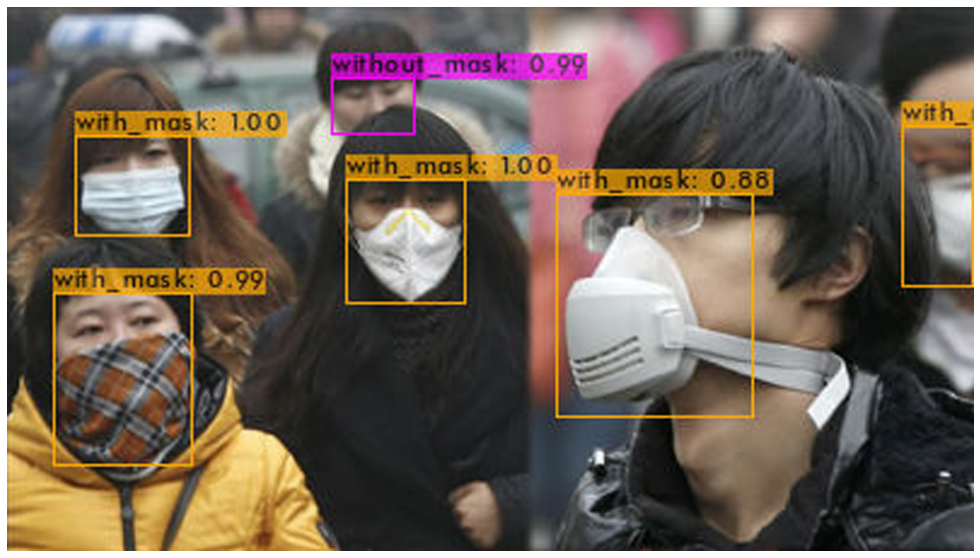

In [20]:
!./darknet detector test data/obj.data ../cfgfiles/configFiles.cfg FaceMaskBestWeights.weights ../testfiles/maksssksksss71.png -thresh 0.3
imShow('predictions.jpg')


video example 

In [21]:
!pip install youtube_dl

import youtube_dl

link = 'https://www.youtube.com/watch?v=mUQLoyNpT5s&ab_channel=ShowAnaHaber'

ydl_opts = {}

with youtube_dl.YoutubeDL(ydl_opts) as ydl:
    info_dict = ydl.extract_info(link, download=False)
    video_title = info_dict.get('title', None)

path = f'./examplevideo.mp4'

ydl_opts.update({'outtmpl':path})

with youtube_dl.YoutubeDL(ydl_opts) as ydl:
    ydl.download([link])

     |████████████████████████████████| 1.8MB 5.3MB/s 
[youtube] mUQLoyNpT5s: Downloading webpage
[youtube] mUQLoyNpT5s: Downloading webpage
[download] Destination: ./examplevideo.f136.mp4
[download] 100% of 30.00MiB in 00:01
[download] Destination: ./examplevideo.mp4.f140
[download] 100% of 1.88MiB in 00:00
[ffmpeg] Merging formats into "./examplevideo.mp4"
Deleting original file ./examplevideo.f136.mp4 (pass -k to keep)
Deleting original file ./examplevideo.mp4.f140 (pass -k to keep)


In [23]:
!./darknet detector demo data/obj.data ../cfgfiles/configFiles.cfg FaceMaskBestWeights.weights -dont_show examplevideo.mp4 -i 0 -out_filename results.avi

Görüntülenen çıkış son 5000 satıra kısaltıldı.
without_mask: 40% 
without_mask: 32% 

FPS:39.0 	 AVG_FPS:41.0

 cvWriteFrame 
Objects:

with_mask: 100% 
with_mask: 50% 
with_mask: 38% 
with_mask: 31% 
without_mask: 76% 
without_mask: 64% 
without_mask: 49% 
without_mask: 39% 
without_mask: 32% 

FPS:40.8 	 AVG_FPS:41.0

 cvWriteFrame 
Objects:

with_mask: 100% 
with_mask: 56% 
with_mask: 46% 
with_mask: 37% 
with_mask: 36% 
without_mask: 71% 
without_mask: 68% 
without_mask: 64% 
without_mask: 41% 
without_mask: 36% 
without_mask: 32% 
without_mask: 27% 

FPS:40.0 	 AVG_FPS:41.0

 cvWriteFrame 
Objects:

with_mask: 99% 
with_mask: 76% 
with_mask: 54% 
with_mask: 30% 
without_mask: 71% 
without_mask: 69% 
without_mask: 59% 
without_mask: 58% 
without_mask: 43% 

FPS:38.6 	 AVG_FPS:41.0

 cvWriteFrame 
Objects:

with_mask: 99% 
with_mask: 50% 
without_mask: 72% 
without_mask: 65% 
without_mask: 49% 
without_mask: 48% 
without_mask: 41% 
without_mask: 32% 

FPS:38.4 	 AVG_FPS:41.0

 cvWri

In [25]:
download("results.avi")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>